<a href="https://colab.research.google.com/github/lovelessbhartal12/machine-learning-codebase/blob/main/outlier_detection_removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df=pd.read_csv('/content/placement.csv')
df.shape

(1000, 3)

DETECTION OF OUTLIER


/tmp/ipython-input-8-2668556641.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
/tmp/ipython-input-8-2668556641.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


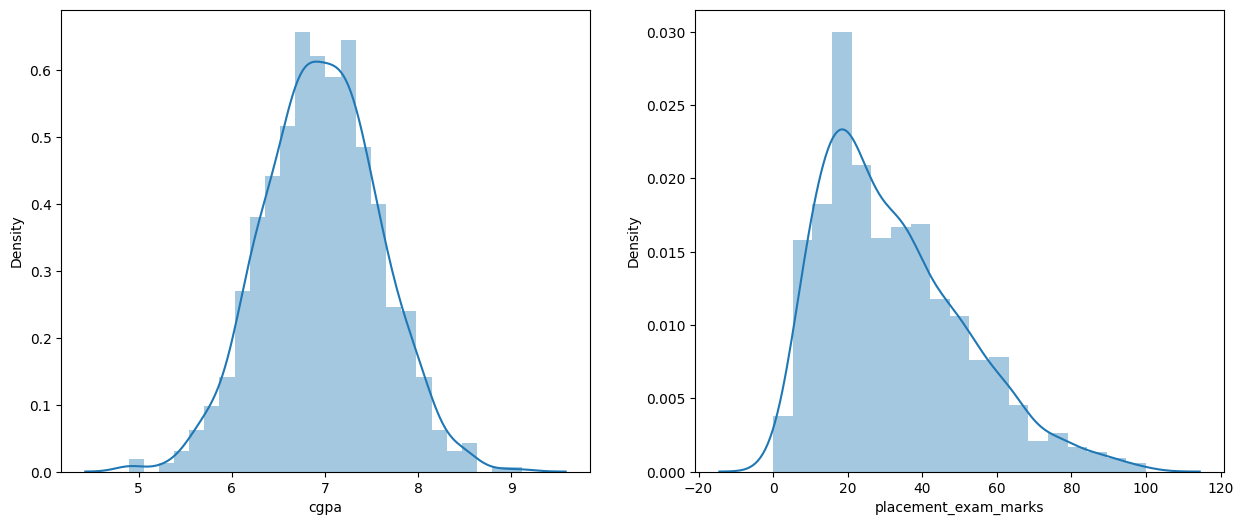

In [8]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [9]:
print("mean value of the cpga",df['cgpa'].mean())
print("standard devaitaion of the cgpa",df['cgpa'].std())
print("max value",df['cgpa'].max())
print("min value",df['cgpa'].min())


mean value of the cpga 6.96124
standard devaitaion of the cgpa 0.6158978751323894
max value 9.12
min value 4.89


In [11]:
print("Highest allowed",df['cgpa'].mean()+3*df['cgpa'].std())
print("lowest allowed",df['cgpa'].mean()-3*df['cgpa'].std())

Highest allowed 8.808933625397168
lowest allowed 5.113546374602832


In [22]:
df[ (df['cgpa'] > df['cgpa'].mean() + 3 * df['cgpa'].std()) |
    (df['cgpa'] < df['cgpa'].mean() - 3 * df['cgpa'].std()) ]


(1000, 3)

#REMOVAL OF THE OUTLIER
 1)TRIMMING


In [25]:
new_df = df[
    (df['cgpa'] < df['cgpa'].mean() + 3 * df['cgpa'].std()) &
    (df['cgpa'] > df['cgpa'].mean() - 3 * df['cgpa'].std())
]
new_df.shape

(995, 3)

#using z_score


In [27]:
df['z_score'] = (df['cgpa'] - df['cgpa'].mean()) / df['cgpa'].std()
df

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [34]:
df[(df['z_score']) > 3]
df

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [32]:
df[df['z_score']<-3]

,cgpa,placement_exam_marks,placed,z_score
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


2)capping


In [37]:
upper_limit = df['cgpa'].mean() + 3 * df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3 * df['cgpa'].std()


(np.float64(8.808933625397168), np.float64(5.113546374602832))

In [38]:
df['cgpa'] = np.where(df['cgpa'] > upper_limit, upper_limit, df['cgpa'])
df['cgpa'] = np.where(df['cgpa'] < lower_limit, lower_limit, df['cgpa'])


In [39]:
df.shape

(1000, 4)

In [40]:
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934


#REMOVAL BY THE IQR method


In [43]:
data=pd.read_csv('/content/placement.csv')
data.head()


,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


/tmp/ipython-input-44-484304966.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['cgpa'])
/tmp/ipython-input-44-484304966.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

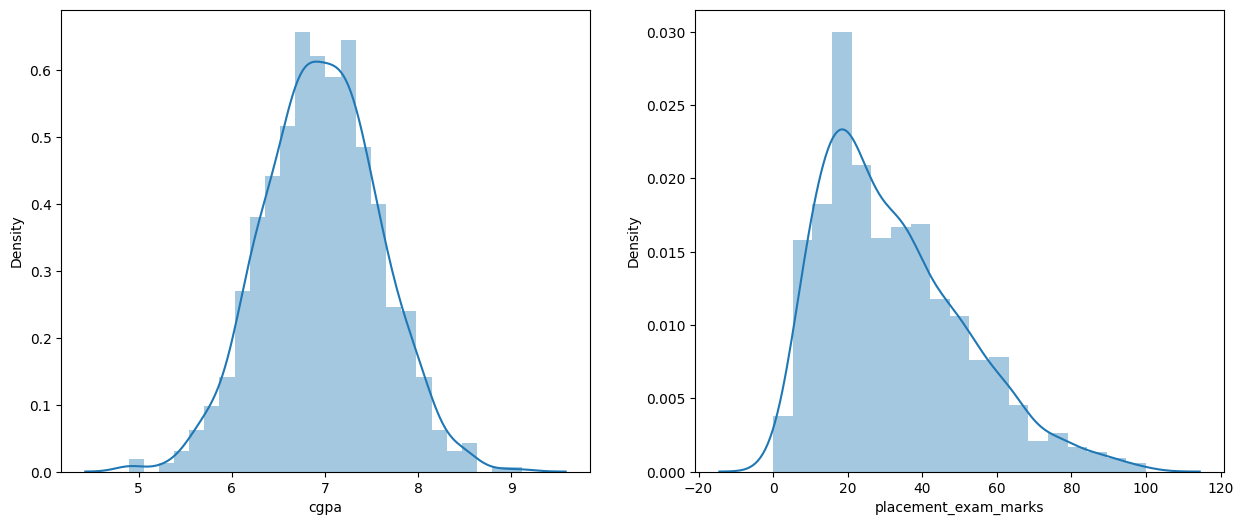

In [44]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(data['cgpa'])
plt.subplot(1,2,2)
sns.distplot(data['placement_exam_marks'])

In [48]:
data['placement_exam_marks'].skew()
data['cgpa'].skew()

np.float64(-0.014529938929314918)

In [60]:
data['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


<Axes: ylabel='placement_exam_marks'>

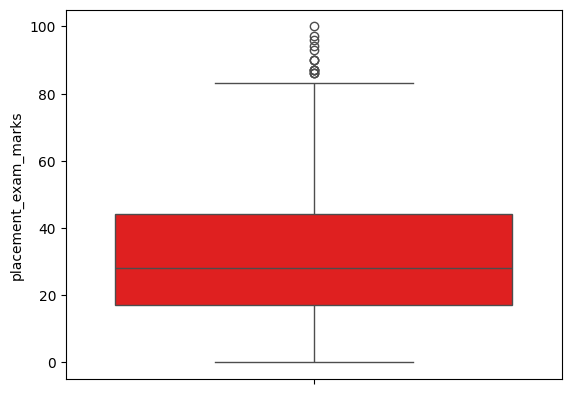

In [52]:
import seaborn as sns
sns.boxplot(data['placement_exam_marks'],color='red')



In [61]:
percentile25=np.percentile(data['placement_exam_marks'],25)
percentile75=np.percentile(data['placement_exam_marks'],75)


In [62]:
percentile75

np.float64(44.0)

In [63]:
IQR=percentile75-percentile25
IQR

np.float64(27.0)

In [64]:
upper_limit=percentile75+1.5*IQR
lower_limit=percentile25-1.5*IQR

In [66]:
upper_limit
lower_limit

np.float64(-23.5)

#finding the outlier

In [69]:
data[data['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [69]:
data[data['placement_exam_marks']<lower_limit]


In [70]:
new_data=data[(data['placement_exam_marks']<upper_limit) & (data['placement_exam_marks']>lower_limit)]

In [71]:
new_data.shape

(985, 3)

/tmp/ipython-input-72-1852955700.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['placement_exam_marks'])
/tmp/ipython-input-72-1852955700.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

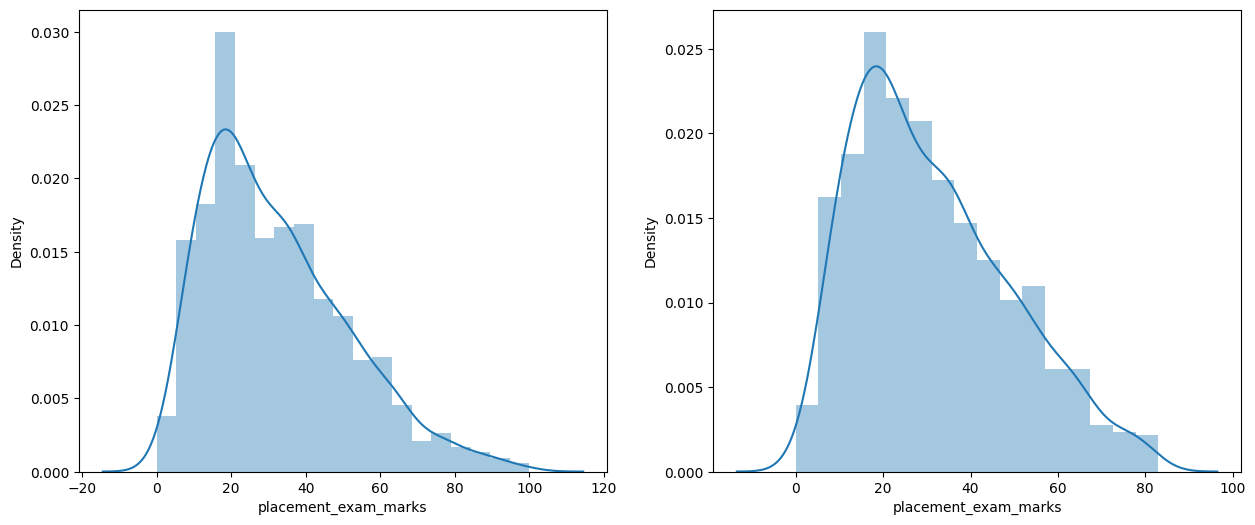

In [72]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(data['placement_exam_marks'])
plt.subplot(1,2,2)
sns.distplot(new_data['placement_exam_marks'])
